In [16]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns   
import sklearn as sk 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
path = "archivos"
dfs = {}
for file in os.scandir(path):
    if file.is_file() and file.name.endswith('.csv'):
        name = os.path.splitext(file.name)[0]  
        dfs[name] = pd.read_csv(file).drop(columns='Unnamed: 0')
        

In [4]:
for name, df in dfs.items():
    df.dropna(axis='columns', how = 'all',inplace=True)
    df.dropna(axis='rows', how = 'any',inplace=True)
    df.reset_index(drop=True, inplace=True)
    if 'random' in name.lower():
        df['knows'] = 0
    else:
        df['knows'] = 1    

In [ ]:
dfs_Randoms = {}
dfs_knows = {}

for name, df in dfs.items():
    # si el nombre del archivo contiene 'RANDOM',  y agregar una columna de clasificacion, si es una pareja random con 0 y 1 
    if 'RANDOM' in name: 
        dfs_Randoms[name] = df
    else:
        dfs_knows[name] = df
# Imprimir los nombres de los DataFrames
print("DataFrames con 'RANDOM':", list(dfs_Randoms.keys()))
print("DataFrames sin 'Conocidos':", list(dfs_knows.keys()))

DataFrames con 'RANDOM': ['CORR-RANDOM_OA', 'CORR-RANDOM_OC', 'CORR-RANDOM_EX']
DataFrames sin 'Conocidos': ['CORR_EX', 'CORR_OC', 'CORR_OA']


In [15]:
df_total = pd.concat(list(dfs_Randoms.values()) + list(dfs_knows.values()), ignore_index=True)
display(df_total)
y = df_total['knows']
X = df_total.drop(columns=['knows','Tipo','Condicion','Banda','Participantes','Grupo'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
display(X_train)

logistic_model = LogisticRegression()

,Participantes,Condicion,Banda,Tipo,Fp1_A-F3_B,Fp1_A-C3_B,Fp1_A-O1_B,Fp1_A-F7_B,Fp1_A-T3_B,Fp1_A-T5_B,...,C4_A-T4_B,C4_A-T6_B,O2_A-F8_B,O2_A-T4_B,O2_A-T6_B,F8_A-T4_B,F8_A-T6_B,T4_A-T6_B,knows,Grupo
0,P01AP02A,OA,AL1,RNG,0.142763,-0.041958,-0.080684,0.006295,0.181337,0.092182,...,-0.008483,-0.048822,0.017541,0.036531,-0.162862,-0.062394,0.042543,-0.061822,0,NaN
1,P01AP02A,OA,AL2,RNG,0.221288,0.261613,0.011087,0.221734,0.228780,0.099140,...,-0.108491,-0.120385,-0.068509,0.055610,0.006639,-0.205955,0.048907,0.147456,0,NaN
2,P01AP02A,OA,BB,RNG,0.171570,0.063807,0.017827,0.029705,-0.004526,0.021170,...,0.024746,-0.031343,-0.011474,0.014392,-0.023173,-0.038180,-0.055637,0.010783,0,NaN
3,P01AP02A,OA,BT,RNG,0.048264,0.124200,-0.071858,0.152838,-0.003074,-0.061213,...,-0.062112,0.075243,-0.074402,0.040915,-0.024581,-0.006956,0.010774,-0.005363,0,NaN
4,P01AP02A,OA,DL,RNG,0.270896,0.184752,0.059462,0.064171,0.062049,0.105528,...,0.232025,-0.046056,-0.092230,0.167385,0.026159,-0.112263,-0.080971,-0.052487,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,P49,OA,AL1,OR,-0.042097,-0.066911,-0.085687,0.061227,-0.077653,-0.076327,...,0.011351,0.032250,-0.033337,-0.016969,-0.093557,-0.104217,0.035904,0.019803,1,1CN
5476,P49,OA,AL2,OR,-0.017270,-0.069299,-0.045423,-0.040078,-0.108024,-0.033801,...,0.029906,-0.034814,0.063559,0.013025,-0.025992,-0.010832,-0.022447,-0.117860,1,1CN
5477,P49,OA,BB,OR,-0.026278,-0.012195,-0.052421,0.057179,-0.057375,-0.088535,...,0.034840,0.028286,-0.057218,0.004108,0.002042,0.002714,0.021608,0.067636,1,1CN
5478,P49,OA,BT,OR,0.012573,0.034273,-0.034346,0.047830,0.028937,-0.035626,...,-0.013672,0.035719,-0.040003,0.030136,0.014643,-0.001492,0.047521,0.059091,1,1CN


,Fp1_A-F3_B,Fp1_A-C3_B,Fp1_A-O1_B,Fp1_A-F7_B,Fp1_A-T3_B,Fp1_A-T5_B,Fp1_A-Fp2_B,Fp1_A-F4_B,Fp1_A-C4_B,Fp1_A-O2_B,...,C4_A-O2_B,C4_A-F8_B,C4_A-T4_B,C4_A-T6_B,O2_A-F8_B,O2_A-T4_B,O2_A-T6_B,F8_A-T4_B,F8_A-T6_B,T4_A-T6_B
3555,0.016571,0.045820,-0.065301,0.041107,-0.056263,-0.080841,0.028734,0.040772,0.043632,-0.058336,...,-0.017918,-0.035350,0.029286,-0.047632,-0.008418,0.011727,-0.031434,-0.025091,0.015791,0.012387
263,0.047150,-0.026147,0.028326,0.061720,-0.054764,0.015748,-0.017831,0.028164,-0.044753,0.054004,...,-0.013050,-0.064766,0.104733,0.057594,-0.012400,0.256911,0.160141,-0.032494,-0.022207,0.027734
1004,-0.084062,0.059403,-0.040191,0.005819,-0.031591,0.005761,0.232502,-0.030731,-0.096457,-0.078498,...,0.151305,0.049944,-0.028589,0.006455,0.091571,0.148221,-0.001984,-0.042747,-0.039932,0.008930
1154,-0.061997,-0.107039,-0.088578,-0.034659,-0.070673,-0.062667,0.086225,0.010812,0.067875,-0.139374,...,-0.079684,0.043763,0.118268,0.003938,0.088307,-0.112459,-0.006233,0.094688,-0.022904,0.029609
2096,-0.003189,-0.073902,0.011331,-0.009753,0.014584,-0.026989,0.015305,0.033922,0.079426,-0.033363,...,0.074981,0.028615,0.089845,0.088071,-0.138701,-0.036614,-0.034173,0.050574,0.061106,-0.095880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,-0.058507,-0.022293,0.024326,0.079272,0.040769,0.053081,-0.059122,-0.068973,-0.091027,0.050779,...,-0.023451,-0.021640,0.120751,0.043572,0.095678,-0.005297,-0.086321,0.053885,-0.013900,0.024140
5101,-0.018565,0.113333,-0.012926,0.118740,0.154202,0.071366,-0.048629,-0.176890,-0.095357,-0.111343,...,-0.050653,0.042461,0.014881,-0.044046,-0.054490,0.040127,0.086364,-0.000502,-0.004352,0.142035
2953,-0.079888,-0.113641,-0.050339,0.091159,0.114075,0.070336,-0.055821,-0.118939,-0.008302,0.038804,...,-0.056545,0.110814,0.011191,-0.054378,0.182792,-0.003003,-0.025690,0.043287,0.076072,-0.013235
2800,0.024320,0.014413,0.002571,-0.023720,-0.030884,-0.035997,-0.030110,0.027813,0.026909,0.033163,...,-0.000810,0.043032,0.016496,0.002111,0.034699,-0.018773,-0.058737,-0.015117,0.004806,-0.006658


In [ ]:
for name, df in dfs_knows.items():

Accuracy: 0.8220802919708029
Confusion Matrix:
 [[901   0]
 [195   0]]


Text(66.25, 0.5, 'Actual')

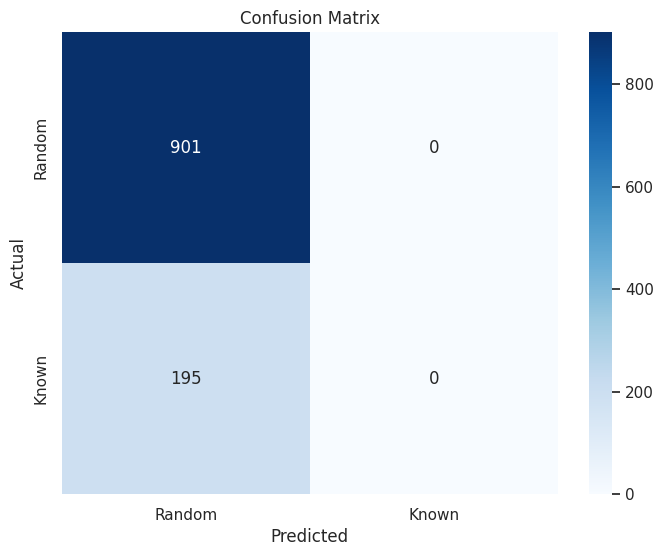

In [13]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Random', 'Known'], yticklabels=['Random', 'Known'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [8]:
from minisom import MiniSom

som = MiniSom(5,5,91, sigma= 0.3,learning_rate=0.5)
X_train_numpy = X_train.to_numpy()
som.train(X_train_numpy, 100)


In [9]:
import plotly.graph_objects as go

win_map = som.win_map(X_train_numpy)
size=som.distance_map().shape[0]
qualities=np.empty((size,size))
qualities[:]=np.nan
for position, values in win_map.items():
    qualities[position[0], position[1]] = np.mean(abs(values-som.get_weights()[position[0], position[1]]))

layout = go.Layout(title='quality plot')
fig = go.Figure(layout=layout)
fig.add_trace(go.Heatmap(z=qualities, colorscale='Viridis'))
fig.show()

